In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('data_4_2.xlsx')
df['constant'] = 1
df

,y,x,constant
0,65,3.36,1
1,156,2.88,1
2,100,3.63,1
3,134,3.41,1
4,16,3.78,1
5,108,4.02,1
6,121,4.00,1
7,4,4.23,1
8,39,3.73,1
9,143,3.85,1


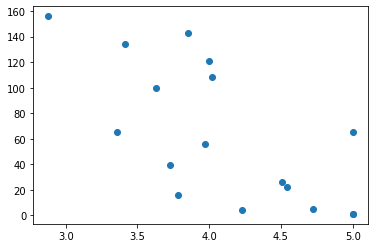

In [3]:

plt.scatter(df['x'], df['y'])

a) the data shows a negative trend

b) the log link function is the appropriate link function

(array([4., 1., 2., 1., 0., 1., 2., 0., 0., 1., 1., 1., 1., 1., 1.]),
 array([  1.        ,  11.33333333,  21.66666667,  32.        ,
         42.33333333,  52.66666667,  63.        ,  73.33333333,
         83.66666667,  94.        , 104.33333333, 114.66666667,
        125.        , 135.33333333, 145.66666667, 156.        ]),
 <BarContainer object of 15 artists>)

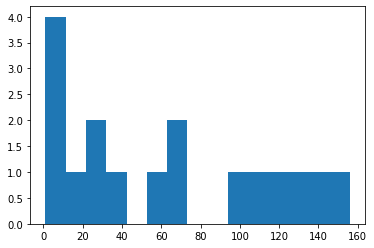

In [5]:
plt.hist(df['y'], bins = 15)

d) fitting a model

In [70]:
import statsmodels.api as sm
model = sm.GLM(df['y'].to_numpy(), df[['x', 'constant']], family = sm.families.Gamma(link = sm.genmod.families.links.Log()))
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   17
Model:                            GLM   Df Residuals:                       15
Model Family:                   Gamma   Df Model:                            1
Link Function:                    Log   Scale:                         0.93886
Method:                          IRLS   Log-Likelihood:                -83.894
Date:                Fri, 29 Apr 2022   Deviance:                       19.457
Time:                        21:20:18   Pearson chi2:                     14.1
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3480
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -1.1093      0.387     -2.865      0.0

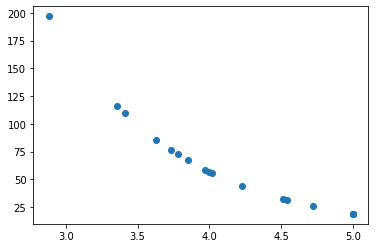

In [72]:
df['y_hat'] = results.mu
plt.scatter(df['x'], df['y_hat'])
plt.title('Predictions')

In [74]:
df['std_residuals'] = (df['y'] - df['y_hat']) / df['y_hat']
df

,y,x,constant,y_hat,std_residuals
0,65,3.36,1,115.613954,-0.437784
1,156,2.88,1,196.904661,-0.207738
2,100,3.63,1,85.690865,0.166986
3,134,3.41,1,109.376030,0.225131
4,16,3.78,1,72.555482,-0.779479
5,108,4.02,1,55.596488,0.942569
6,121,4.00,1,56.843734,1.128643
7,4,4.23,1,44.043046,-0.909180
8,39,3.73,1,76.693459,-0.491482
9,143,3.85,1,67.134675,1.130047


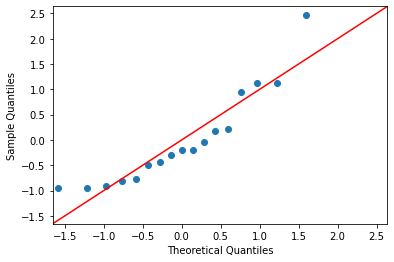

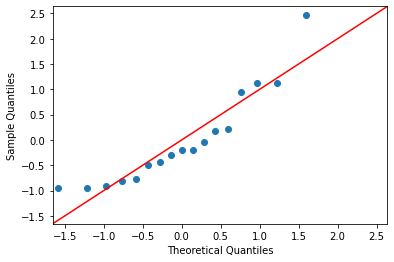

In [75]:
sm.qqplot(df['std_residuals'], line='45')

the model fits well, and is adequate. The residuals have an approximately normal distribution